In [2]:
from MRF import *
import matplotlib.pyplot as plt

In [2]:
simulated_data = pd.read_csv("../Datasets/mrf_sim.csv", index_col = 'index')

In [7]:
url='https://drive.google.com/file/d/1Sp_2HGdIY0y9m5htlskIbNqWo02FCGNb/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
simulated_data = pd.read_csv(url, index_col = "index")

In [8]:
simulated_data

,sim_y,sim_x1,sim_x2,sim_x3,sim_x4,sim_x5,sim_x6,sim_x7,sim_x8,sim_x9,sim_x10,sim_x11,sim_x12,sim_x13,sim_x14,sim_x15,trend
index,,,,,,,,,,,,,,,,,
0,-0.441805,1.262954,-1.045718,-0.390010,-1.687801,-1.424032,-0.286852,-0.959316,-0.123546,-0.614495,-0.183680,0.444346,-0.661850,1.357601,0.095309,-0.276508,1
1,-2.793370,-0.326233,-0.896211,-1.819222,0.647646,-1.669344,1.841107,-1.620317,0.147393,2.827808,0.237404,0.011929,-0.346816,-0.322125,0.991170,-0.854418,2
2,2.537384,1.329799,1.269387,0.659181,0.448794,1.379236,-0.156764,0.822513,-1.240966,1.500310,-0.570730,-0.009280,1.339732,-1.106561,0.428252,1.484950,3
3,1.769591,1.272429,0.593841,0.459622,1.026302,-0.919675,-1.389803,0.108713,2.004243,-0.038204,0.678865,-0.302378,0.592419,0.038225,1.118214,-1.597299,4
4,2.299628,0.414641,0.775634,1.616626,1.074978,-0.504490,-1.473104,0.760995,-0.771980,-0.833423,-1.465345,0.492355,0.718904,0.743779,-0.739658,0.374999,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.986892,1.790485,-1.688692,-1.505401,0.164891,1.017508,-0.371810,-0.461154,-1.123832,1.108883,0.002205,-0.197546,0.061681,-0.326253,0.478526,-1.590491,196
196,-0.458651,-1.064165,-1.572373,1.519297,0.868577,-0.969918,0.291791,1.904377,1.081743,2.059115,-0.346824,2.592252,-1.194686,1.776474,-0.540043,0.734870,197
197,0.800348,0.017637,-0.404987,0.367409,-1.078034,1.066352,-0.418050,-0.348632,1.261543,-0.096137,-0.485862,1.287147,1.217083,-1.643429,2.498486,1.150781,198


In [4]:
### Dependent Variable
my_var = "sim_y"
y_pos = simulated_data.columns.get_loc(my_var)

### Exogenous Variables
S_vars = [f"sim_x{i}" for i in range(1, 16)] + ['trend']
S_pos = [simulated_data.columns.get_loc(s) for s in S_vars]

### Variables Included in Linear Equation
x_vars = ["sim_x1", 'sim_x2', 'sim_x3']
x_pos = [simulated_data.columns.get_loc(x) for x in x_vars]

In [5]:
original_data = simulated_data.copy()

In [6]:
oos_pos = np.arange(len(simulated_data) - 50, len(simulated_data)) # lower should be oos start, upper the length of your dataset

In [7]:
MRF = MacroRandomForest(data = simulated_data,
                        y_pos = y_pos,
                        x_pos = x_pos,
                        S_pos = S_pos, 
                        B = 100, 
                        parallelise = True,
                        n_cores = 3,
                        resampling_opt = 2,
                        oos_pos = oos_pos,
                        trend_push = 4,
                        quantile_rate = 0.3, 
                        print_b = True,
                        fast_rw = True)

In [8]:
mrf_output = MRF._ensemble_loop()

In [9]:
forecasts = pd.DataFrame(mrf_output['pred'])

In [10]:
forecasts

,Ensembled_Prediction
150,1.612115
151,-0.386241
152,-0.426129
153,0.638700
154,0.445148
155,0.017088
156,-0.341803
157,1.111062
158,-0.146751
159,-0.511965


Text(0.5, 1.0, 'OOS predictions of MRF')

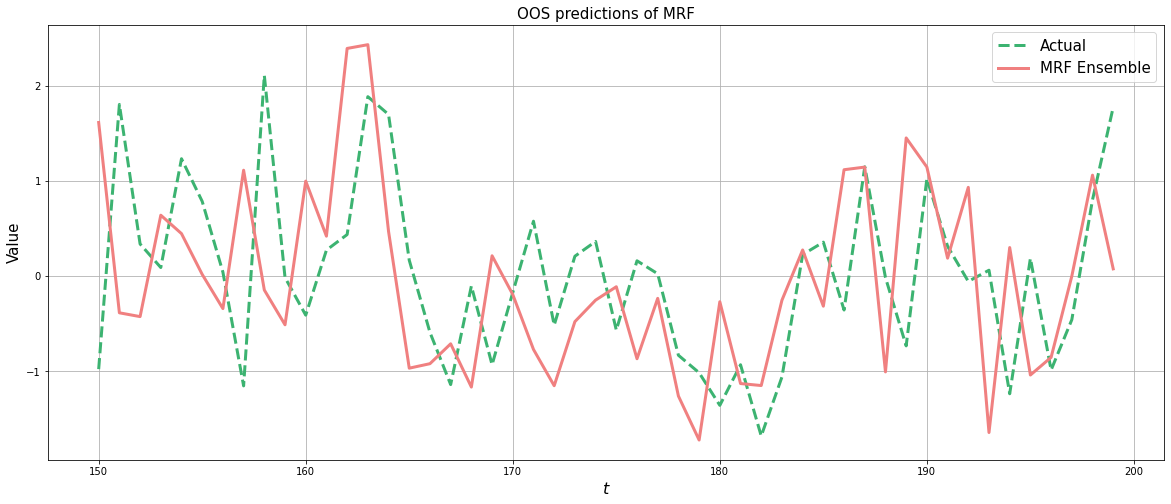

In [13]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 8)

ax.plot(original_data['sim_y'].shift(1).loc[oos_pos], label = 'Actual', linewidth = 3, color ='mediumseagreen', linestyle = '--')
ax.plot(forecasts, color = 'lightcoral', linewidth = 3, label = "MRF Ensemble")
ax.legend(fontsize = 15)
ax.set_ylabel("Value", fontsize = 15)
ax.grid()
ax.set_xlabel(r"$t$", fontsize = 16)
ax.set_title("OOS predictions of MRF", fontsize = 15)

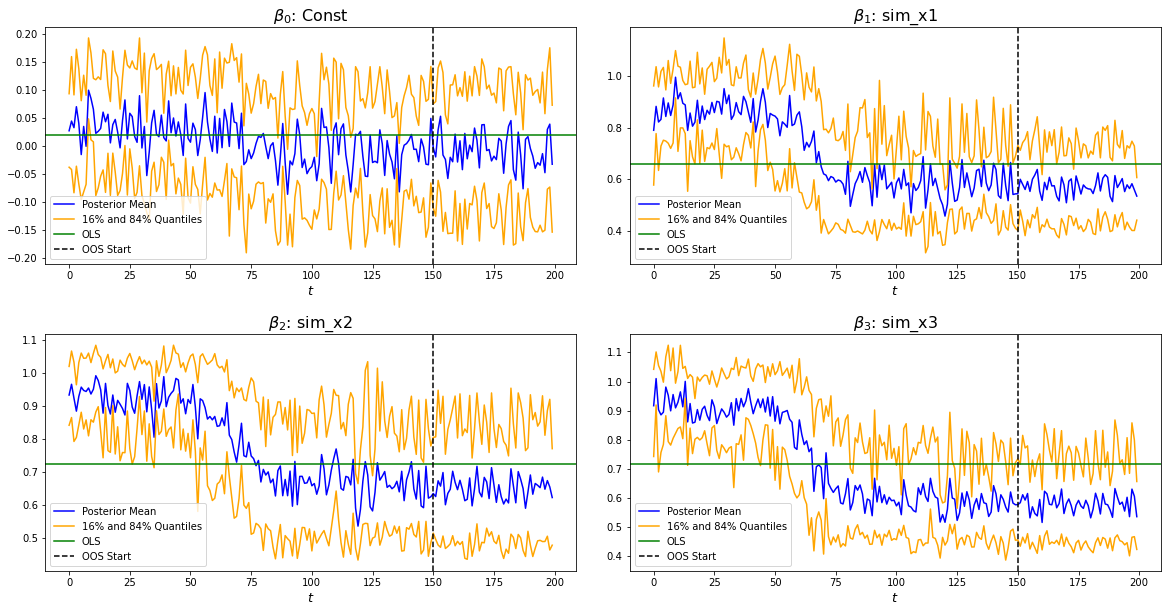

In [12]:
MRF.band_plots()